In [1]:
import numpy as np
np.random.seed(42)
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [2]:
dataset = load_wine()
x, y = dataset.data, dataset.target

In [3]:
df = pd.DataFrame(x, columns = dataset.feature_names)
df["y"] = y
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.3, random_state=42)

In [5]:
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 8, 10],
    'min_samples_split': [1, 2, 4], 
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [6]:
clf = DecisionTreeClassifier()
grid_cv = GridSearchCV(clf, parameters, cv = 10, n_jobs = -1)
grid_cv.fit(x_train, y_train)

c:\Users\gutsc\Documents\Coding\LangChain_Udemy\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
1000 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
294 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\gutsc\Documents\Coding\LangChain_Udemy\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\gutsc\Documents\Coding\LangChain_Udemy\.venv\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
  File "c:\Users\gutsc\Documents\Coding\LangChain_Udemy\.venv\Lib\site-packages\sklearn\base.p

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [None, 2, ...], 'max_features': ['auto', 'sqrt', ...], 'min_samples_leaf': [1, 2], ...}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [7]:
print(f"Parameters of best model: {grid_cv.best_params_}")
print(f"Score of best model: {grid_cv.best_score_}")

Parameters of best model: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}
Score of best model: 0.9589743589743589


In [ ]:
clf = DecisionTreeClassifier(
    criterion='gini', 
    max_depth=10, 
    max_features='sqrt', 
    min_samples_leaf=1, 
    min_samples_split=2)
clf.fit(x_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [9]:
score = clf.score(x_test, y_test)
print(f"Accuracy: {score}")

Accuracy: 0.8703703703703703


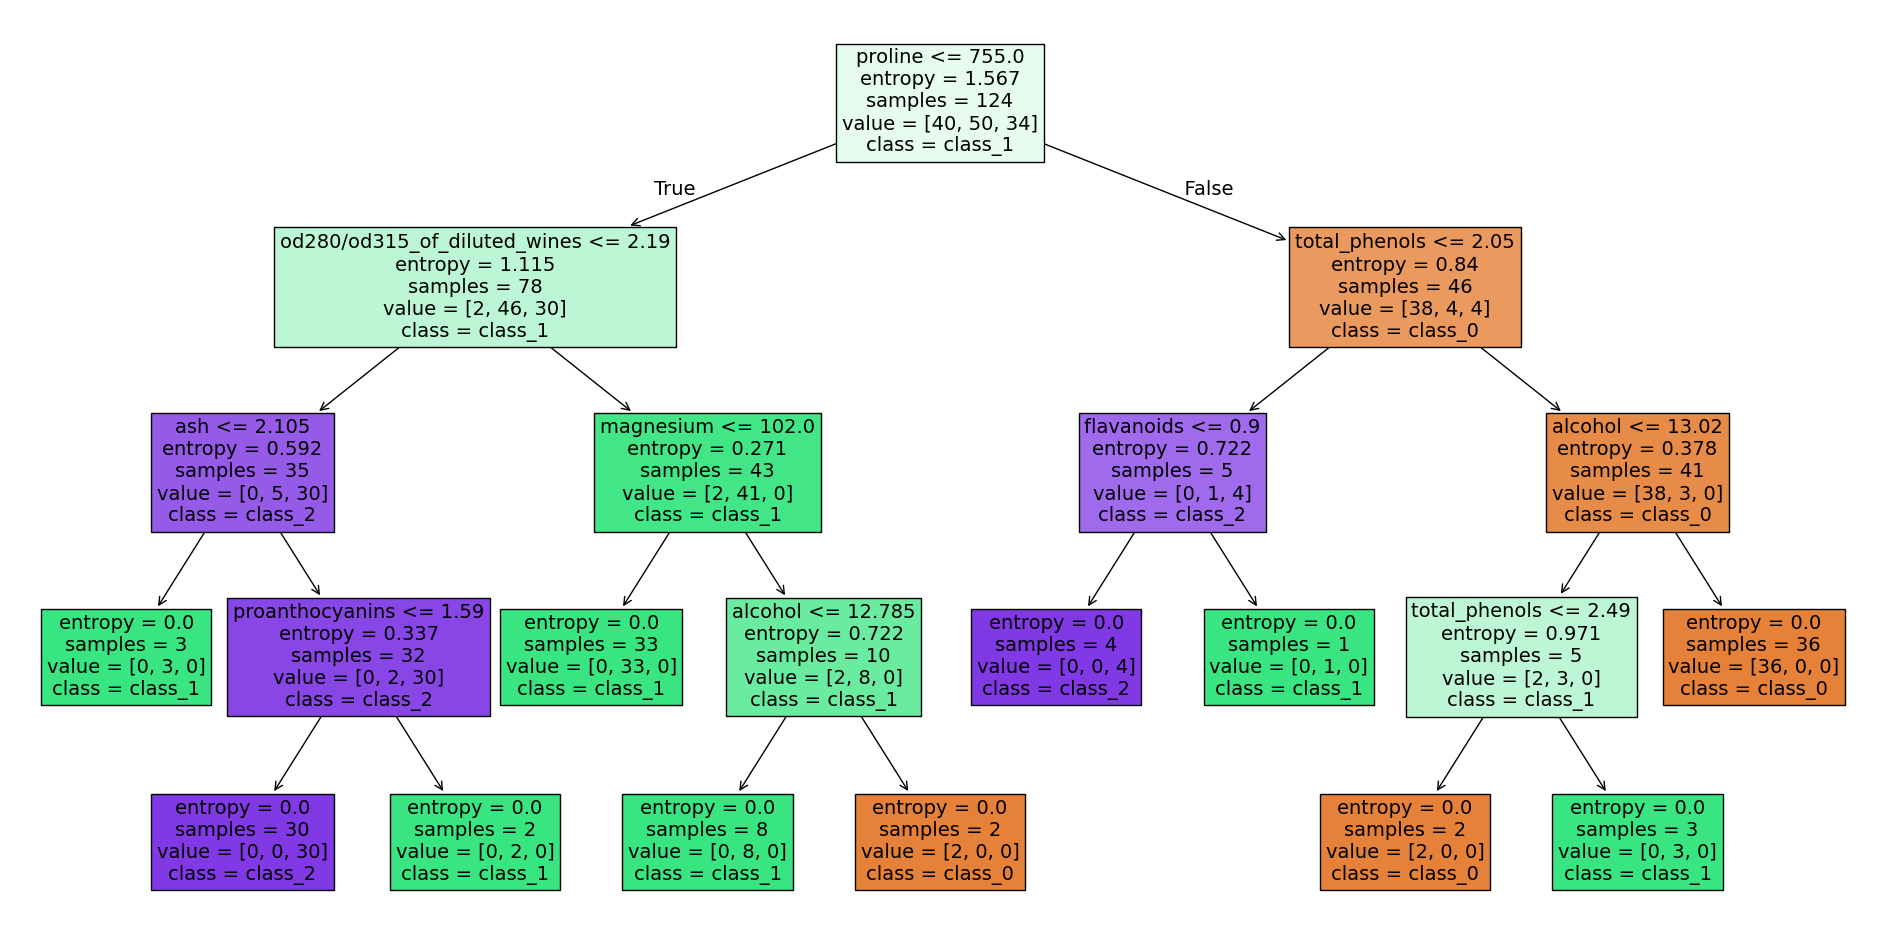

In [12]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(24,12))
tree.plot_tree(clf, 
               feature_names=dataset.feature_names, 
               class_names=dataset.target_names, 
               fontsize=14,
               filled=True)
plt.show()

In [11]:
from sklearn.tree import export_text

tree_rules = export_text(clf, feature_names=dataset.feature_names)
print(tree_rules)

|--- proline <= 755.00
|   |--- od280/od315_of_diluted_wines <= 2.19
|   |   |--- ash <= 2.11
|   |   |   |--- class: 1
|   |   |--- ash >  2.11
|   |   |   |--- proanthocyanins <= 1.59
|   |   |   |   |--- class: 2
|   |   |   |--- proanthocyanins >  1.59
|   |   |   |   |--- class: 1
|   |--- od280/od315_of_diluted_wines >  2.19
|   |   |--- magnesium <= 102.00
|   |   |   |--- class: 1
|   |   |--- magnesium >  102.00
|   |   |   |--- alcohol <= 12.78
|   |   |   |   |--- class: 1
|   |   |   |--- alcohol >  12.78
|   |   |   |   |--- class: 0
|--- proline >  755.00
|   |--- total_phenols <= 2.05
|   |   |--- flavanoids <= 0.90
|   |   |   |--- class: 2
|   |   |--- flavanoids >  0.90
|   |   |   |--- class: 1
|   |--- total_phenols >  2.05
|   |   |--- alcohol <= 13.02
|   |   |   |--- total_phenols <= 2.49
|   |   |   |   |--- class: 0
|   |   |   |--- total_phenols >  2.49
|   |   |   |   |--- class: 1
|   |   |--- alcohol >  13.02
|   |   |   |--- class: 0

